<a href="https://colab.research.google.com/github/gnc506/Skills_Assessment/blob/main/Skill_Assessment_2_Tabassum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load datasets
articles_data = pd.read_csv('/content/drive/MyDrive/articles.Dengue.csv')
authors_data = pd.read_csv('/content/drive/MyDrive/authors.Dengue.csv')
paper_count_data = pd.read_csv('/content/drive/MyDrive/paper_counts.csv')

#Who is working with whom Collaboration.


In [ ]:
from itertools import combinations
from collections import defaultdict

In [ ]:
# Creating a dictionary to count collaborations between each pair of authors
collaboration_counter = defaultdict(int)

for _, paper in authors_data.groupby('PMID'):
    authors = paper['AuthorLastname'].tolist()
    for author1, author2 in combinations(authors, 2):
        # Sort the pair to avoid duplicate entries (e.g., (A, B) is the same as (B, A))
        author_pair = tuple(sorted([author1, author2]))
        collaboration_counter[author_pair] += 1


In [ ]:
# Sorting the collaborations by their counts
sorted_collaborations = sorted(collaboration_counter.items(), key=lambda x: x[1], reverse=True)


In [ ]:
# Selecting the top 20 collaborations
top_collaborations = sorted_collaborations[:20]

In [ ]:

# Creating a DataFrame for the top collaborations
top_collaborations_df = pd.DataFrame(top_collaborations, columns=['Author Pair', 'Number of Collaborations'])
top_df = top_collaborations_df.head(20)  # Display the top 20 collaborations
top_df

,Author Pair,Number of Collaborations
0,"(Chen, Lin)",232
1,"(Li, Zhang)",204
2,"(Chen, Liu)",198
3,"(Chen, Wang)",186
4,"(Wang, Zhang)",186
5,"(Li, Wang)",182
6,"(Li, Liu)",181
7,"(Nguyen, Nguyen)",158
8,"(Chen, Li)",153
9,"(Chen, Wu)",153


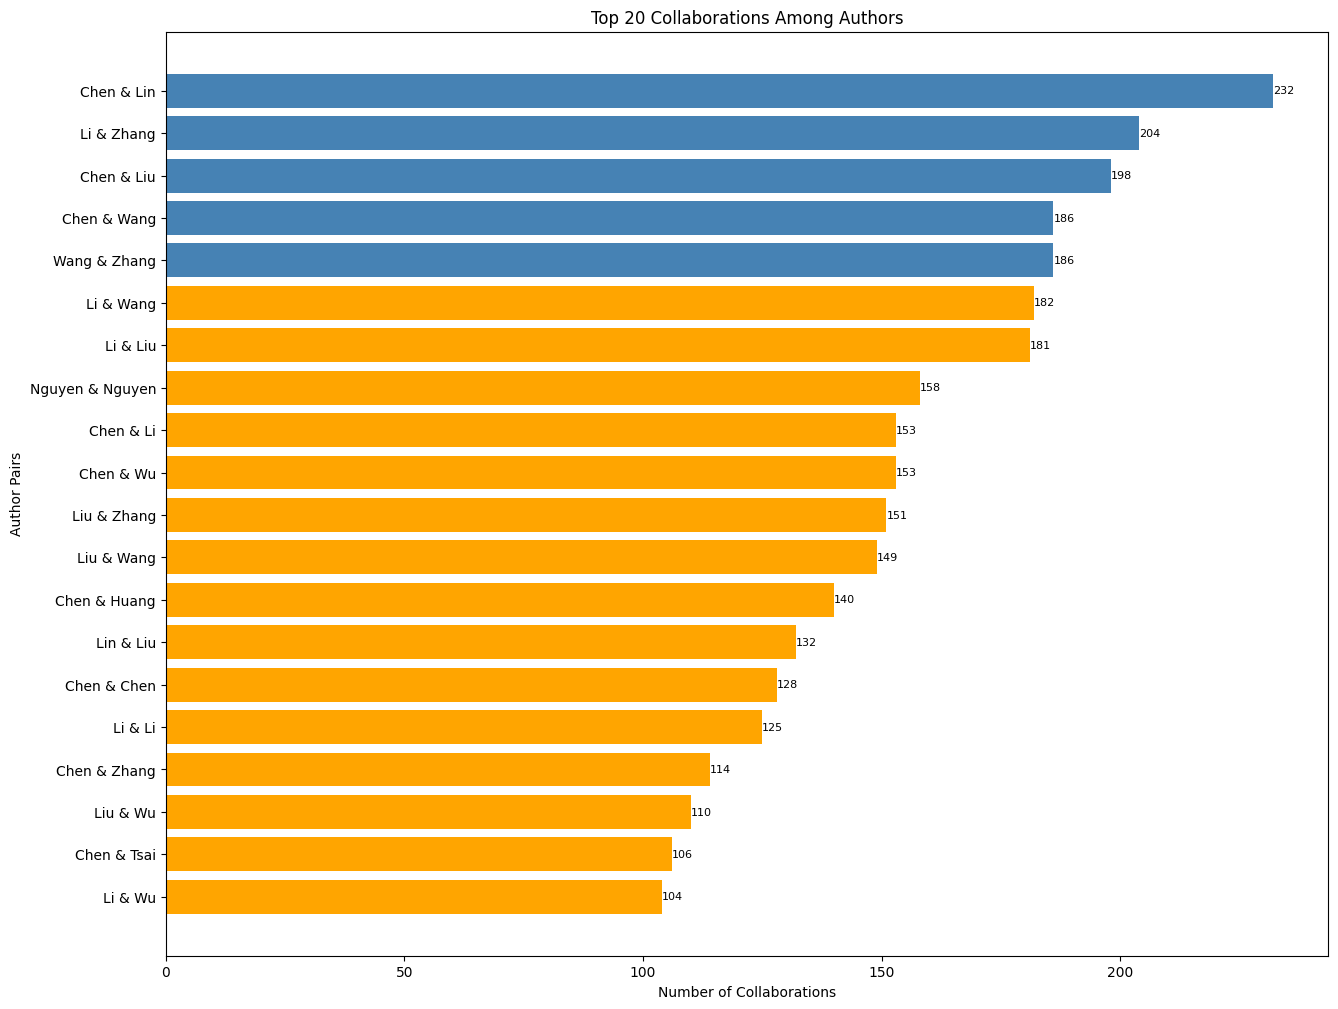

In [ ]:
import matplotlib.pyplot as plt

# Preparing data for plotting
author_pairs = [" & ".join(pair) for pair, _ in top_collaborations]
collaboration_counts = [count for _, count in top_collaborations]

# Improved visualization with enhanced readability and distinct coloring for top collaborations

# Selecting a color scheme
colors = ['steelblue' if i < 5 else 'orange' for i in range(len(collaboration_counts))]

# Plotting
plt.figure(figsize=(15, 12))
bars = plt.barh(author_pairs, collaboration_counts, color=colors)
plt.xlabel('Number of Collaborations')
plt.ylabel('Author Pairs')
plt.title('Top 20 Collaborations Among Authors')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value on top

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=8)
    plt.savefig('collaboration.png')
plt.show()

#Performing the visualization

In [ ]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:
# Finding the top 5 authors based on the number of collaborations
author_collaboration_counts = defaultdict(int)

In [ ]:
for _, paper in authors_data.groupby('PMID'):
    authors = paper['AuthorLastname'].tolist()
    for author in authors:
        author_collaboration_counts[author] += len(authors) - 1  # Counting collaborations for each author


In [ ]:

# Sorting authors by their number of collaborations
sorted_authors = sorted(author_collaboration_counts.items(), key=lambda x: x[1], reverse=True)


In [ ]:
# Selecting the top 10 authors
top_5_authors = sorted_authors[:5]
top_5_authors_names = [author[0] for author in top_5_authors]


In [ ]:
# Creating a network graph for the top 10 authors
G_top_5 = nx.Graph()

for _, paper in authors_data.groupby('PMID'):
    authors = [author for author in paper['AuthorLastname'].tolist() if author in top_5_authors_names]
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G_top_5.add_edge(authors[i], authors[j])


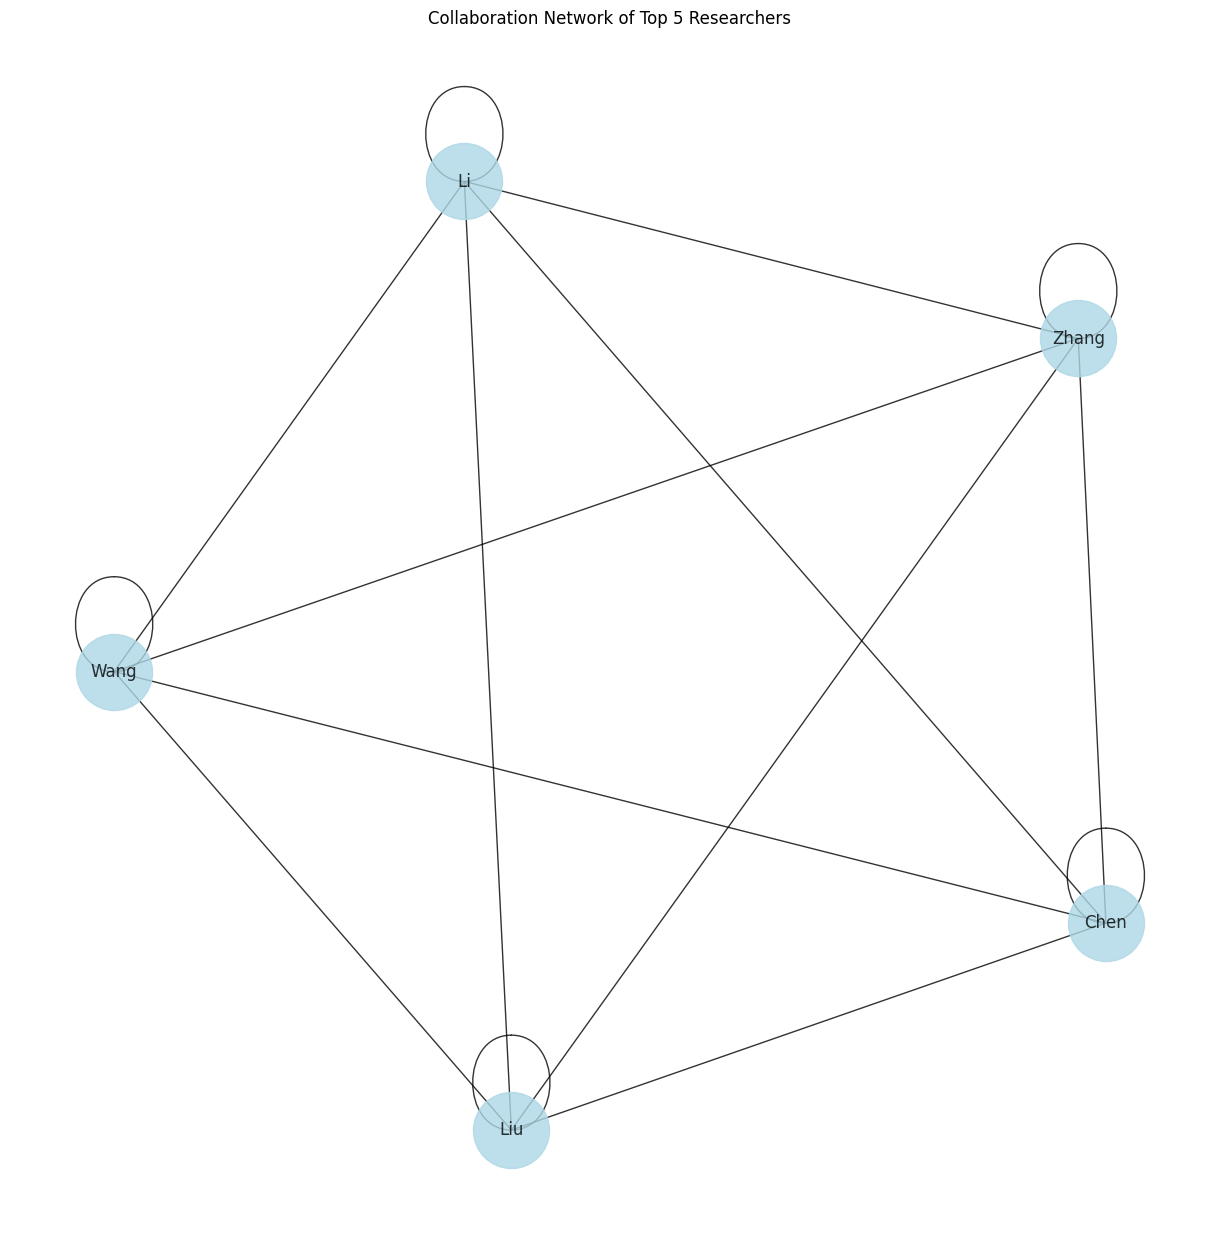

In [ ]:
# Drawing the network graph
plt.figure(figsize=(12, 12))
nx.draw(G_top_5, with_labels=True, node_size=3000, node_color='lightblue', alpha=0.8, font_size=12)
plt.title("Collaboration Network of Top 5 Researchers")

plt.savefig('plot.png')
plt.show()

In [ ]:
# Commenting the code as the network is too complex for now to understand
import networkx as nx

In [ ]:
# Creating a network graph for the top collaborations
G = nx.Graph()

In [ ]:
# Adding edges with weights (number of collaborations)
for (author1, author2), count in top_collaborations:
    G.add_edge(author1, author2, weight=count)

In [ ]:
# Positioning the graph using spring layout for better visibility
pos = nx.spring_layout(G, k=0.5, iterations=1)

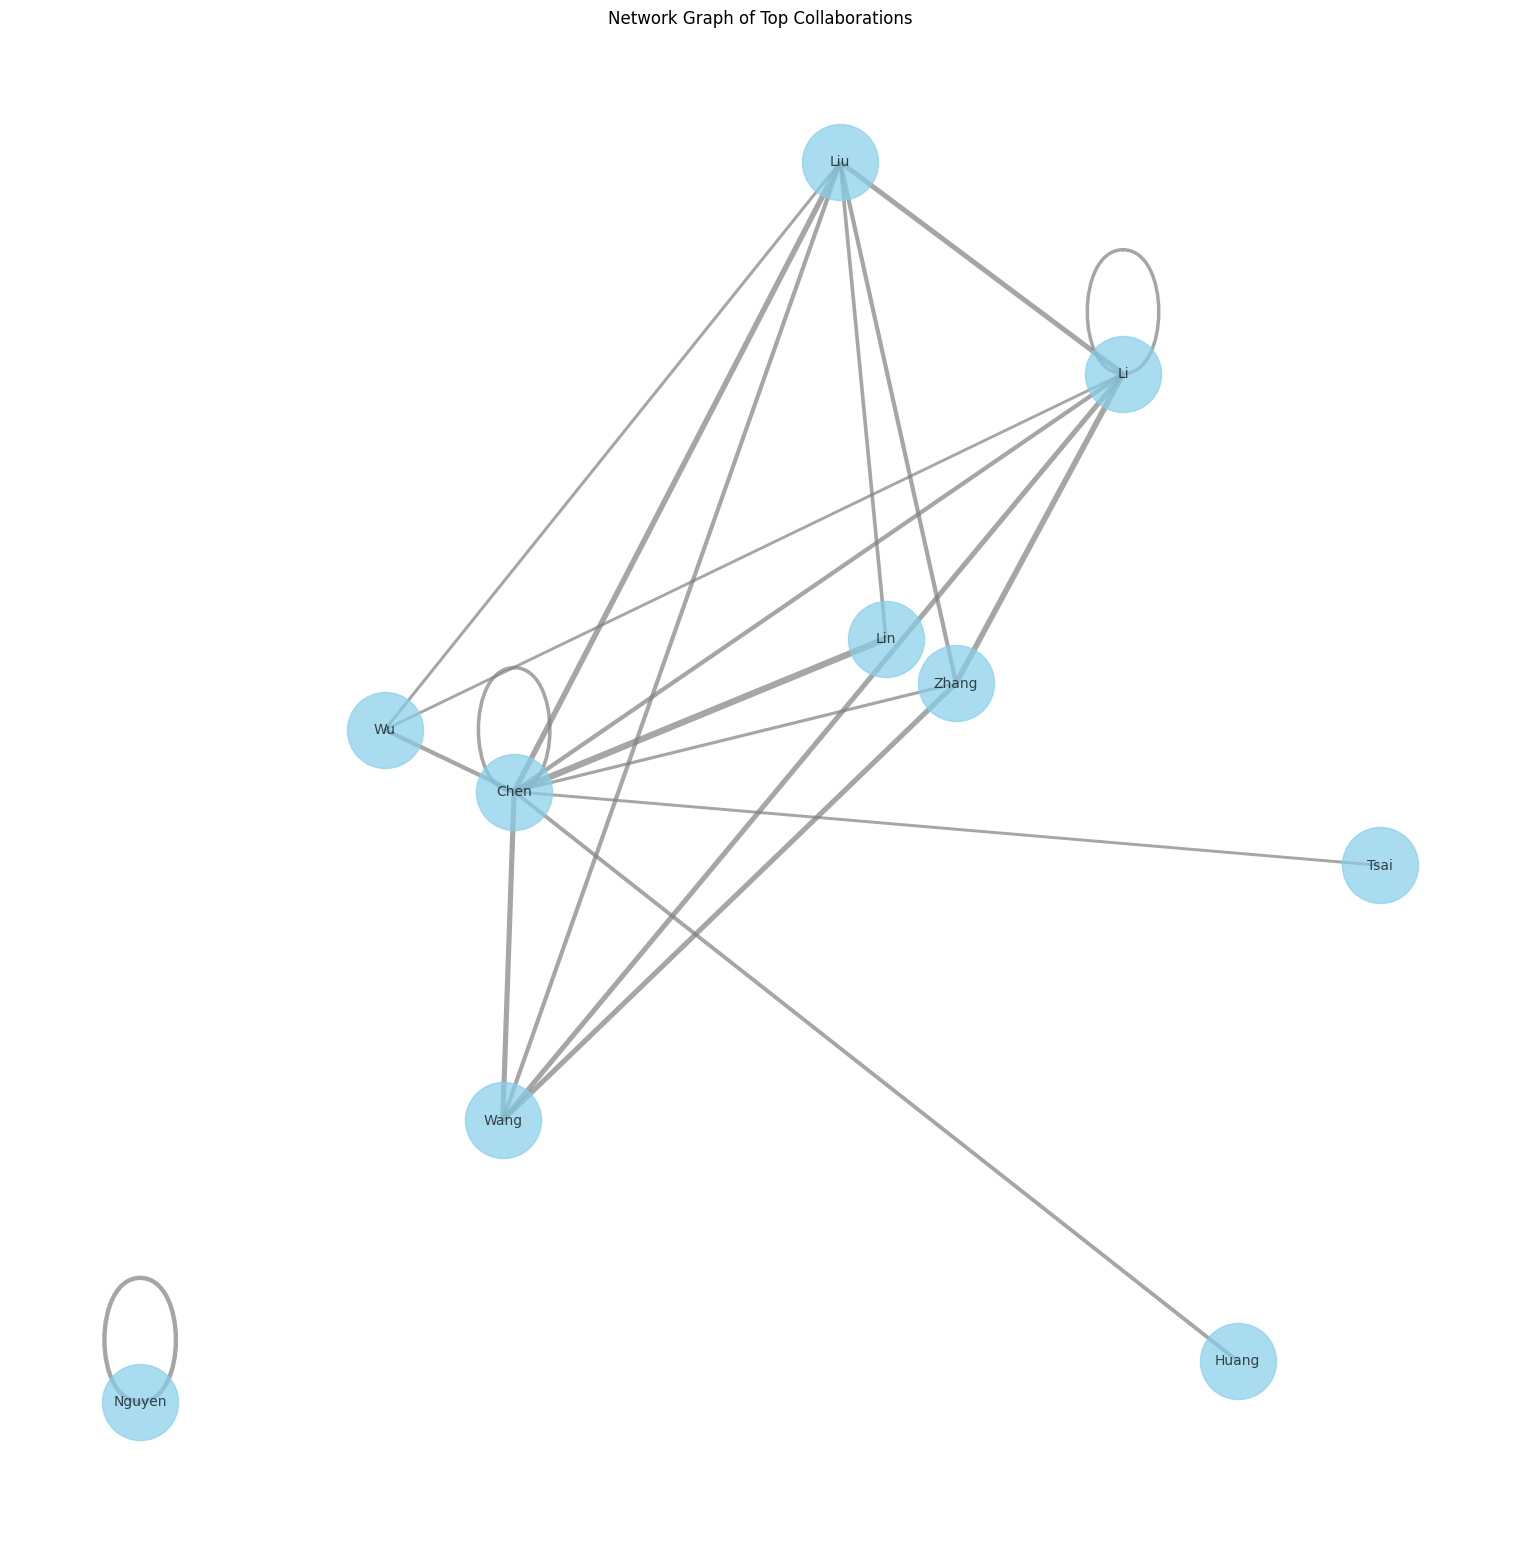

In [ ]:
# Drawing the network graph
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', alpha=0.7,
        width=[(G[u][v]['weight']/50) for u, v in G.edges()], edge_color='gray', font_size=10)
plt.title('Network Graph of Top Collaborations')
plt.show()

# For Clean Data

In [ ]:
article_clean_data = pd.read_csv('/content/drive/MyDrive/articles.Dengue.csv')
author_clean_data = pd.read_csv('/content/drive/MyDrive/authors.Dengue.csv')
paper_count = pd.read_csv('/content/drive/MyDrive/paper_counts.csv')

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a subset of authors_df with relevant columns
authors_sub_df = author_clean_data[['PMID', 'AuthorLastname', 'AuthorInitials']]

# Creating a DataFrame for pairs of authors who worked together on the same paper
# This is done by merging the authors dataframe with itself on PMID
author_pairs = pd.merge(author_clean_data, author_clean_data, on='PMID')

# Removing rows where an author is paired with themselves
author_pairs = author_pairs[author_pairs['AuthorLastname_x'] != author_pairs['AuthorLastname_y']]

# Creating a combined key for each pair (to aggregate counts)
author_pairs['pair_key'] = author_pairs.apply(lambda row: tuple(sorted([
    str(row['AuthorLastname_x']) + str(row['AuthorInitials_x']),
    str(row['AuthorLastname_y']) + str(row['AuthorInitials_y'])
])), axis=1)
# Counting the number of collaborations for each pair
collaboration_counts = author_pairs['pair_key'].value_counts()



In [ ]:
collaboration_counts

(BalmasedaA, HarrisE)        98
(LinYS, YehTM)               74
(AmadorM, BarreraR)          64
(LeoYS, LyeDC)               60
(MalavigeGN, OggGS)          60
                             ..
(ChenSR, LeeJC)               2
(HuHC, LeeJC)                 2
(LeeJC, WuYC)                 2
(BacklundA, LeeJC)            2
(Al MobinM, KamrujjamanM)     2
Name: pair_key, Length: 245719, dtype: int64

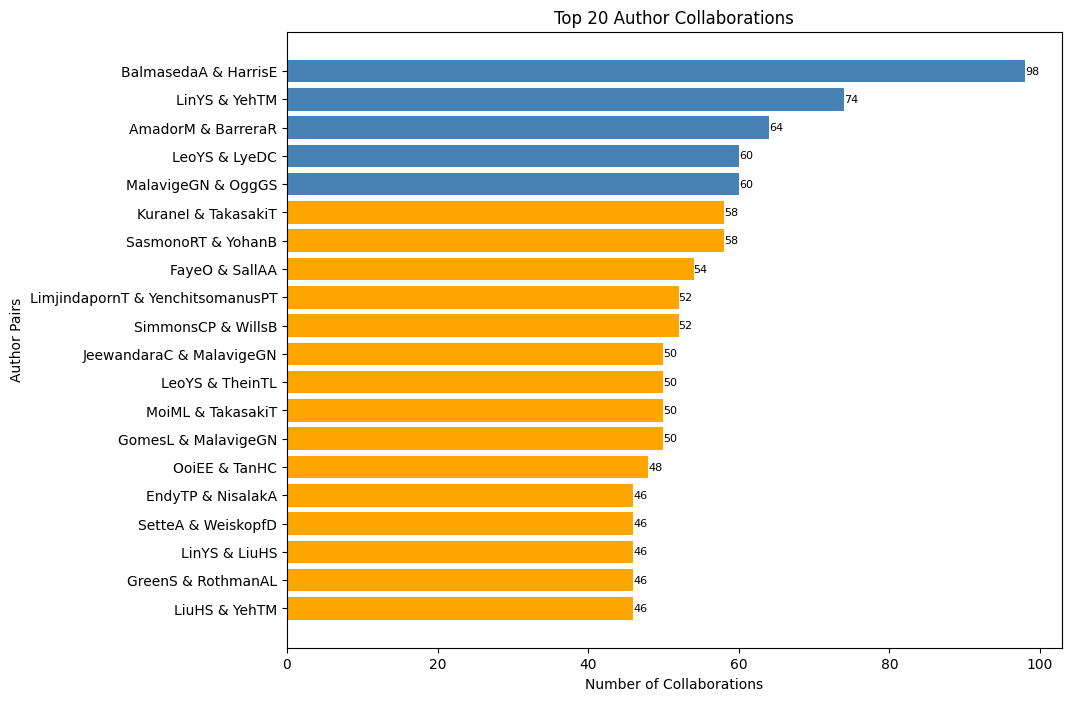

In [ ]:
import matplotlib.pyplot as plt

# Extracting the top 20 collaborations
top_20_collaborations = collaboration_counts.head(20)

# Preparing data for the bar plot
pairs = [" & ".join(pair) for pair in top_20_collaborations.index]
counts = top_20_collaborations.values

# Selecting a color scheme
colors = ['steelblue' if i < 5 else 'orange' for i in range(len(top_20_collaborations))]

# Creating the horizontal bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(pairs, counts, color= colors)
plt.xlabel('Number of Collaborations')
plt.ylabel('Author Pairs')
plt.title('Top 20 Author Collaborations')
plt.gca().invert_yaxis()   # Invert y-axis to display the highest value on top

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=8)
    plt.savefig('collaboration.png')
plt.show()

In [ ]:
from itertools import combinations
from collections import defaultdict
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:
# Example preprocessing steps
author_clean_data.dropna(inplace=True)  # Drop rows with missing values
authors_df = author_clean_data.drop_duplicates()

In [33]:
 # Creating a map of PMID to authors
pmid_authors_map = {}
for _, row in authors_df.iterrows():
    pmid = row['PMID']
    author = (row['AuthorForename'], row['AuthorLastname'])
    if pmid in pmid_authors_map:
            pmid_authors_map[pmid].add(author)
    else:
           pmid_authors_map[pmid] = {author}

# Counting the collaborations for each researcher
researcher_collaboration_count = {}
for pmid, authors in pmid_authors_map.items():
     for author in authors:
        if author in researcher_collaboration_count:
              researcher_collaboration_count[author] += len(authors) - 1
        else:
          researcher_collaboration_count[author] = len(authors) - 1



# Collaboration of 20 Researchers

In [34]:
# Identifying the top 20 researchers
top_20_researchers = sorted(researcher_collaboration_count.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_researchers_list = [item[0] for item in top_20_researchers]


top_20_researchers

[(('Eva', 'Harris'), 827),
 (('Cameron P', 'Simmons'), 499),
 (('Richard G', 'Jarman'), 452),
 (('Eng Eong', 'Ooi'), 415),
 (('Angel', 'Balmaseda'), 413),
 (('Aravinda M', 'de Silva'), 413),
 (('Kouichi', 'Morita'), 376),
 (('Pei-Yong', 'Shi'), 352),
 (('Tyler M', 'Sharp'), 344),
 (('Subhash G', 'Vasudevan'), 343),
 (('In-Kyu', 'Yoon'), 337),
 (('Stefan', 'Fernandez'), 324),
 (('Stephen J', 'Thomas'), 323),
 (('Ralf', 'Bartenschlager'), 317),
 (('Alessandro', 'Sette'), 315),
 (('Daniela', 'Weiskopf'), 310),
 (('R Tedjo', 'Sasmono'), 308),
 (('Bridget', 'Wills'), 303),
 (('Alan L', 'Rothman'), 298),
 (('Prida', 'Malasit'), 284)]

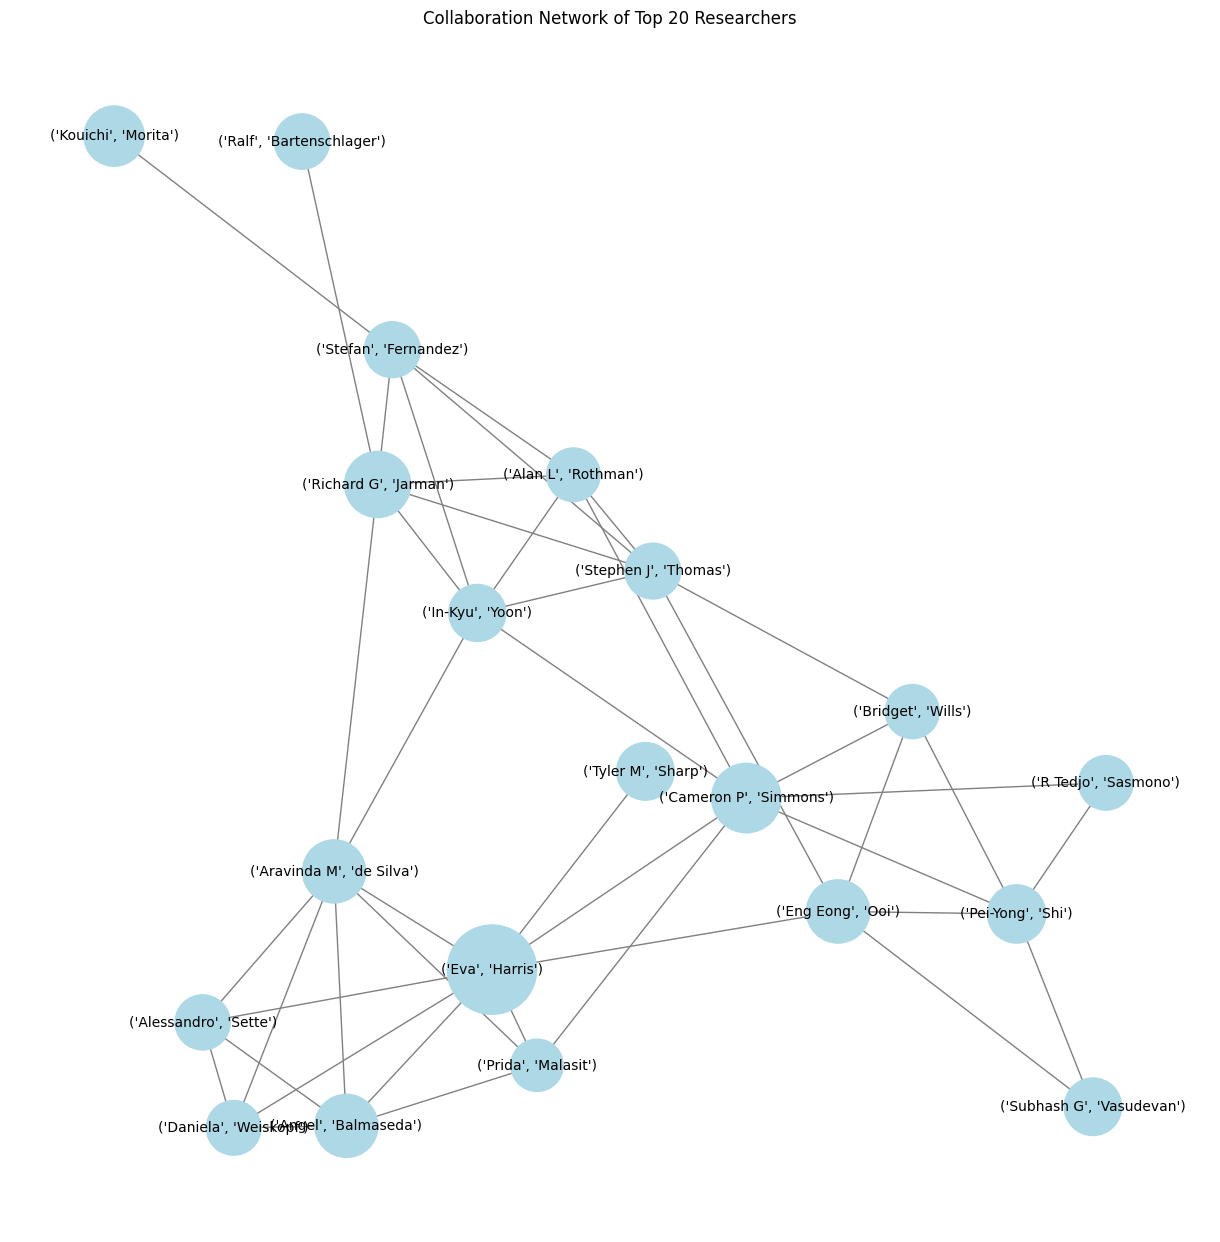

In [35]:

# Creating a subgraph with these top 20 researchers
top_20_researchers_subgraph = nx.Graph()
for authors in pmid_authors_map.values():
     for author_pair in combinations(authors, 2):
          if author_pair[0] in top_20_researchers_list and author_pair[1] in top_20_researchers_list:
              top_20_researchers_subgraph.add_edge(*author_pair)

# Creating a network graph for the top collaborations
G = nx.Graph()
# Preparing node sizes based on the number of collaborations
node_sizes = [researcher_collaboration_count[researcher]*5 for researcher in top_20_researchers_subgraph.nodes]

# Positioning the graph using spring layout for better visibility
pos = nx.spring_layout(G, k=0.5, iterations=1)

# Visualizing the top 20 researchers' collaboration subgraph with node sizes
plt.figure(figsize=(12, 12))
nx.draw(top_20_researchers_subgraph, with_labels=True, node_size=node_sizes, font_size=10, node_color="lightblue", width=[(G[u][v]['weight']/50) for u, v in G.edges()], edge_color="gray")
plt.title("Collaboration Network of Top 20 Researchers")
plt.savefig("top20.png")
plt.show()

# Collaboration of 50 Researchers

In [36]:
# Identifying the top 50 researchers
top_50_researchers = sorted(researcher_collaboration_count.items(), key=lambda x: x[1], reverse=True)[:50]
top_50_researchers_list = [item[0] for item in top_50_researchers]
top_50_researchers

[(('Eva', 'Harris'), 827),
 (('Cameron P', 'Simmons'), 499),
 (('Richard G', 'Jarman'), 452),
 (('Eng Eong', 'Ooi'), 415),
 (('Angel', 'Balmaseda'), 413),
 (('Aravinda M', 'de Silva'), 413),
 (('Kouichi', 'Morita'), 376),
 (('Pei-Yong', 'Shi'), 352),
 (('Tyler M', 'Sharp'), 344),
 (('Subhash G', 'Vasudevan'), 343),
 (('In-Kyu', 'Yoon'), 337),
 (('Stefan', 'Fernandez'), 324),
 (('Stephen J', 'Thomas'), 323),
 (('Ralf', 'Bartenschlager'), 317),
 (('Alessandro', 'Sette'), 315),
 (('Daniela', 'Weiskopf'), 310),
 (('R Tedjo', 'Sasmono'), 308),
 (('Bridget', 'Wills'), 303),
 (('Alan L', 'Rothman'), 298),
 (('Prida', 'Malasit'), 284),
 (('Gabriela', 'Paz-Bailey'), 281),
 (('Stephen S', 'Whitehead'), 263),
 (('Duane J', 'Gubler'), 257),
 (('Kay M', 'Tomashek'), 244),
 (('Annelies', 'Wilder-Smith'), 242),
 (('Meng Ling', 'Moi'), 236),
 (('Thomas W', 'Scott'), 235),
 (('Anna P', 'Durbin'), 234),
 (('Amy C', 'Morrison'), 233),
 (('Yen-Hsu', 'Chen'), 232),
 (('Bjoern', 'Peters'), 226),
 (('Chunya'

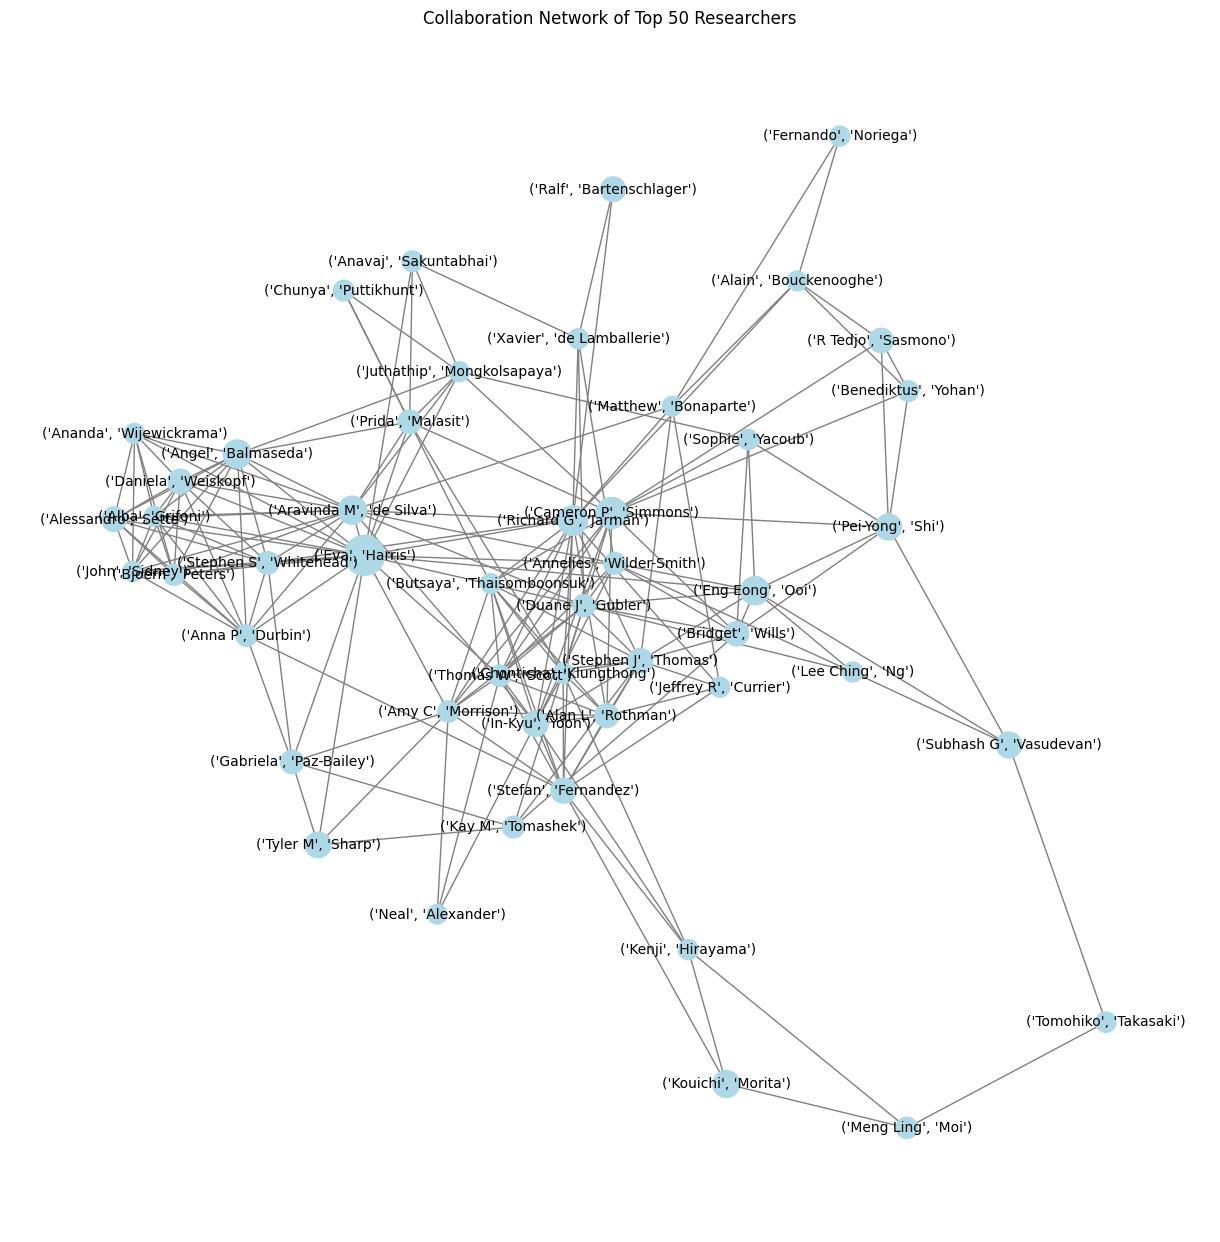

In [37]:
# Creating a subgraph with these top 50 researchers
top_50_researchers_subgraph = nx.Graph()
for authors in pmid_authors_map.values():
     for author_pair in combinations(authors, 2):
          if author_pair[0] in top_50_researchers_list and author_pair[1] in top_50_researchers_list:
              top_50_researchers_subgraph.add_edge(*author_pair)

# Creating a network graph for the top collaborations
G = nx.Graph()
# Preparing node sizes based on the number of collaborations
node_sizes = [researcher_collaboration_count[researcher] for researcher in top_50_researchers_subgraph.nodes]

# Positioning the graph using spring layout for better visibility
pos = nx.spring_layout(G, k=0.5, iterations=1)

# Visualizing the top 20 researchers' collaboration subgraph with node sizes
plt.figure(figsize=(12, 12))
nx.draw(top_50_researchers_subgraph, with_labels=True, node_size=node_sizes, font_size=10, node_color="lightblue", width=[(G[u][v]['weight']/50) for u, v in G.edges()], edge_color="gray")
plt.title("Collaboration Network of Top 50 Researchers")
plt.savefig("top50.png")
plt.show()